In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_curve

In [35]:
df = pd.read_csv('mushrooms_dataset.csv')

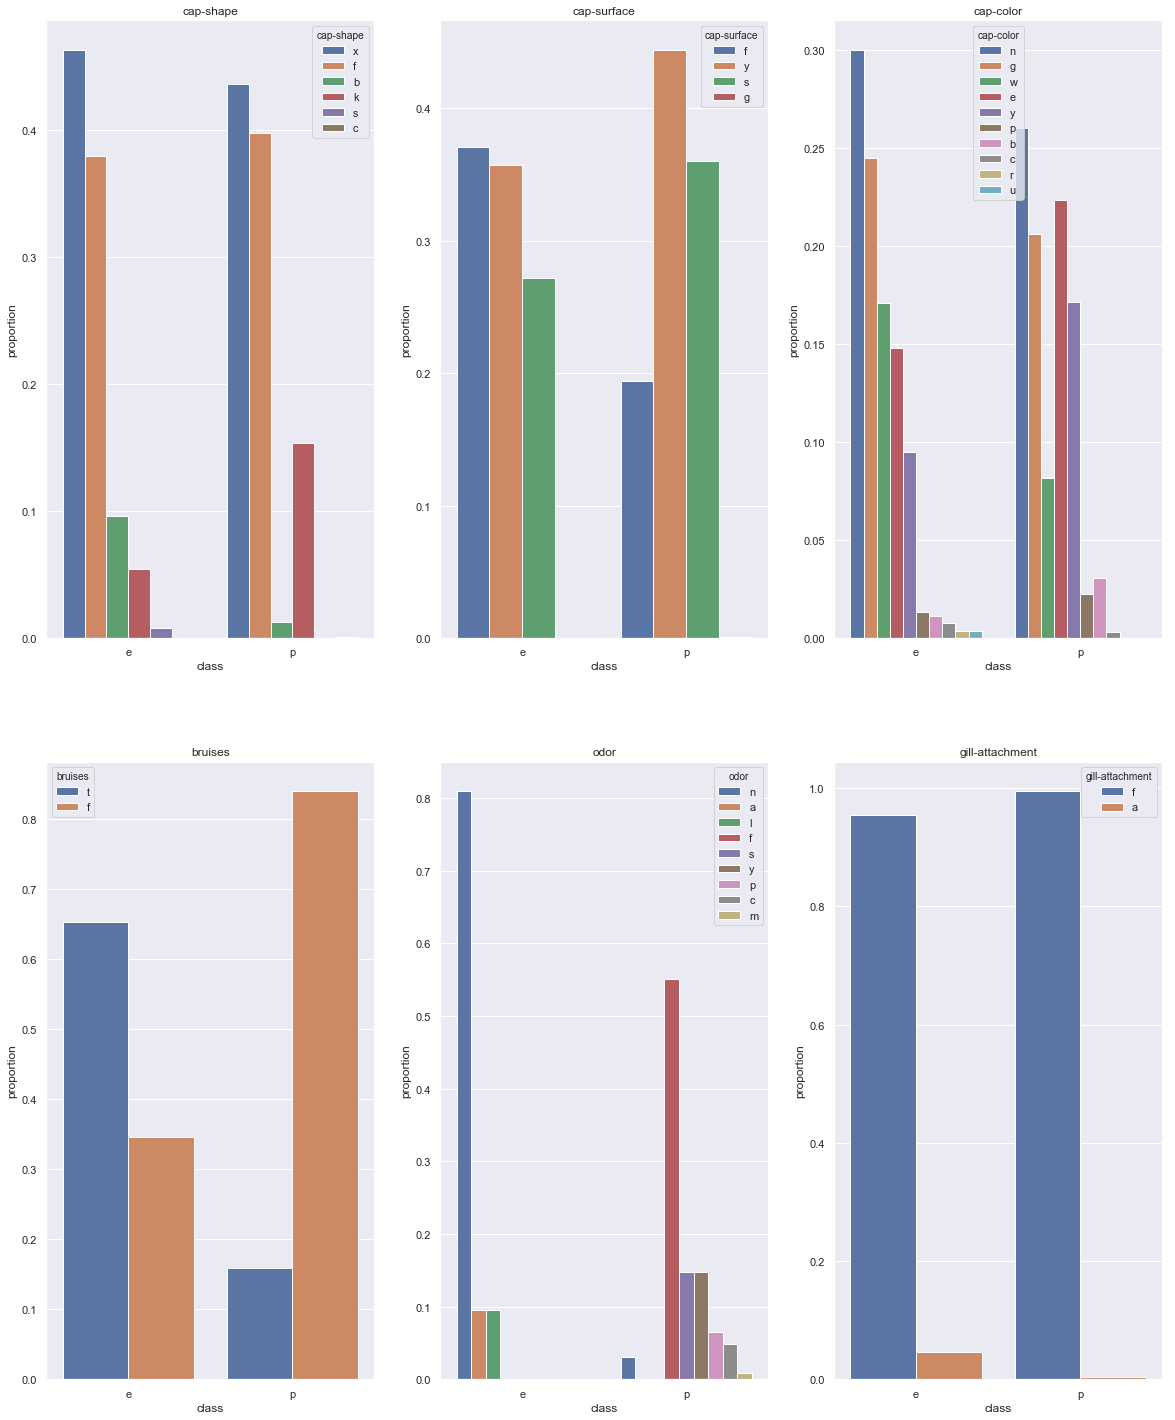

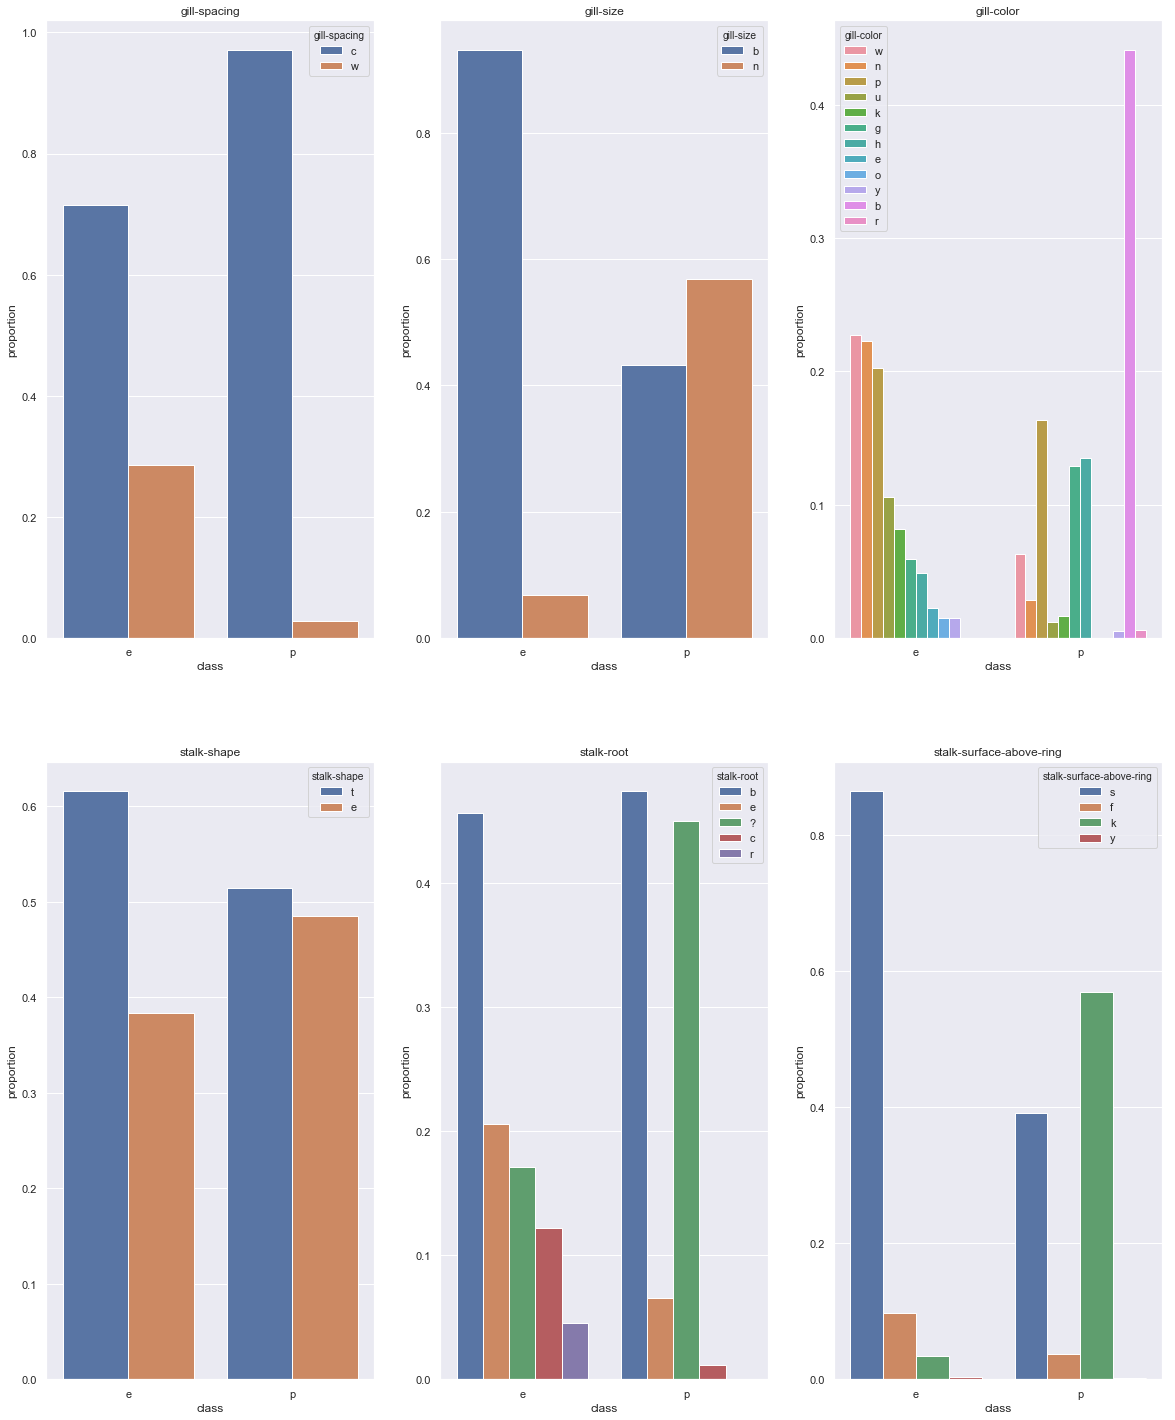

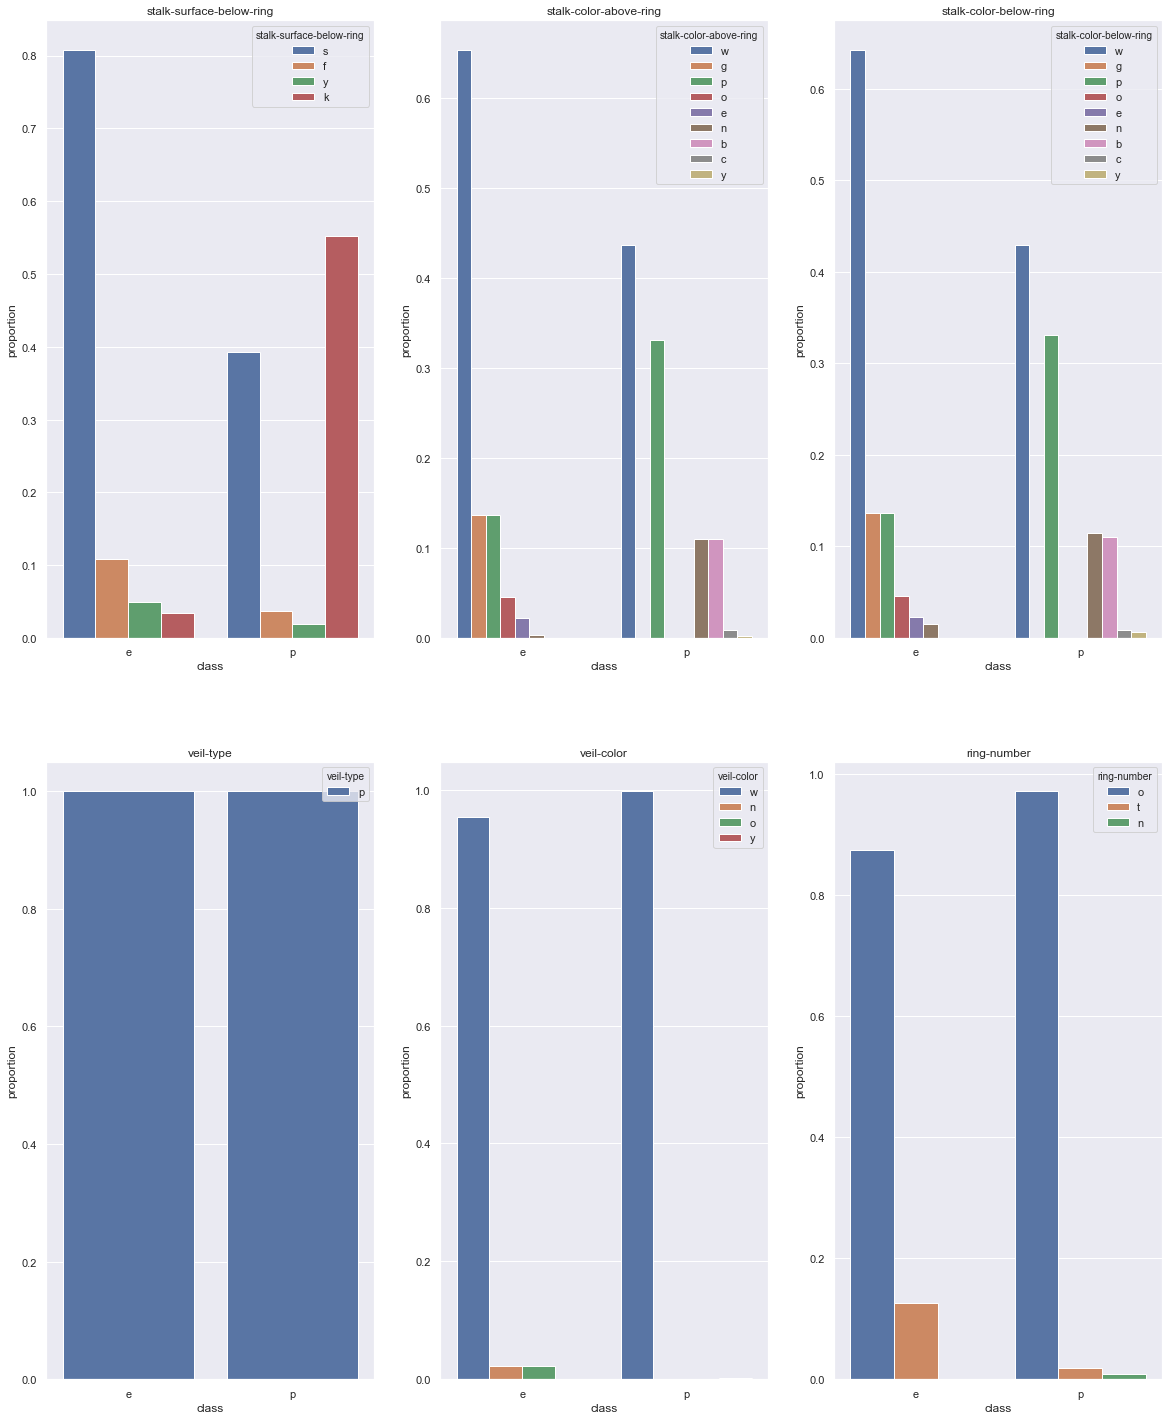

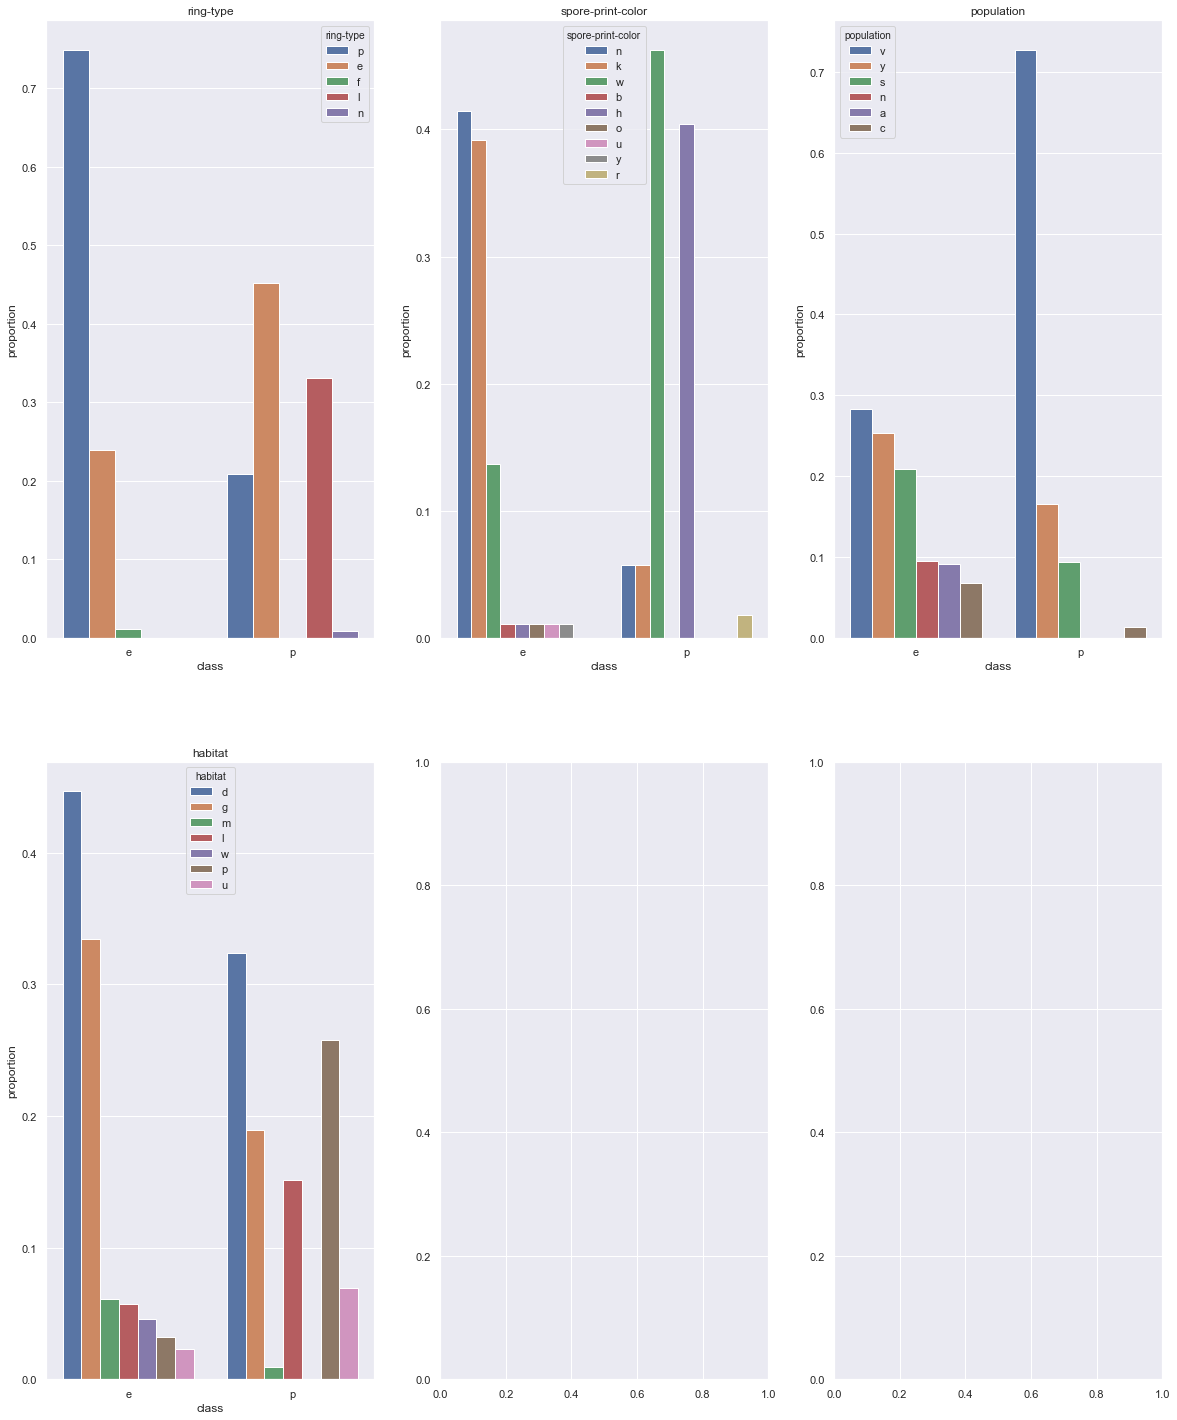

In [36]:

#usporedba vrijednosti po klasi otrovna ili jestiva

sns.set(style="darkgrid")
names = df.columns

for k in range(4):
    fig, axe = plt.subplots(2, 3, figsize=(20, 25))
    for i in range(1+k*(6),7+k*(6)): 
        if i == 23:
            break
        prop_df = (df.iloc[:,i].groupby(df.iloc[:,0]).value_counts(normalize=True).rename('proportion').reset_index())
        if i-k*(6)<4:
            sns.barplot(hue=prop_df.iloc[:,1], x=prop_df.iloc[:,0], y=prop_df.iloc[:,2], data=prop_df, ax=axe[0][i-k*(6)-1]).set_title(names[i])
        else:
            sns.barplot(hue=prop_df.iloc[:,1], x=prop_df.iloc[:,0], y=prop_df.iloc[:,2], data=prop_df, ax=axe[1][i-k*(6)-3-1]).set_title(names[i])

In [3]:
#pošto su podaci kategorički, moramo ih prvo prebaciti u numerički oblik
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [4]:
num=df.select_dtypes(include=['number'])
num.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [23]:


IQR=[]
var_range=[]
std=[]
var=[]
mean=[]

for i in range(num.shape[1]):
    IQR.append(num.iloc[:,i].quantile(0.75)-num.iloc[:,i].quantile(0.25))


    
for i in range(num.shape[1]):
    var_range.append(num.iloc[:,i].max()-num.iloc[:,i].min())


for i in range(num.shape[1]):
    std.append(num.iloc[:,i].std())

for i in range(num.shape[1]):
    var.append(num.iloc[:,i].var())
    
for i in range(num.shape[1]):
    mean.append(num.iloc[:,i].mean())

data={
    
    'IQR' : IQR,
    'Varianton range' : var_range,
    'Standard deviation' : std,
    'Variance' : var,
    'Mean' : mean
    
}

index=list(num.columns)

Stat_disp=pd.DataFrame(data=data, index=index)
Stat_disp
 


,IQR,Varianton range,Standard deviation,Variance,Mean
class,1.0,1,0.499708,0.249708,0.482029
cap-shape,3.0,5,1.604329,2.573872,3.348104
cap-surface,3.0,3,1.229873,1.512586,1.827671
cap-color,5.0,9,2.545821,6.481204,4.504677
bruises,1.0,1,0.492848,0.242900,0.415559
odor,3.0,8,2.103729,4.425676,4.144756
gill-attachment,0.0,1,0.158695,0.025184,0.974151
gill-spacing,0.0,1,0.368011,0.135432,0.161497
gill-size,1.0,1,0.462195,0.213624,0.309207
gill-color,5.0,11,3.540359,12.534142,4.810684


In [41]:

#Logistička regresija-drugi način

Y = df['class'] 
data = df
data.drop('class',axis=1,inplace=True)

In [44]:
df.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [47]:
X = df
X.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9464615384615385

In [ ]:
#dobili smo 94% točnosti